## ExperiWatt - Gehirn und Energie
In diesem Arbeitsblatt lernt ihr eigenständig eine vollständige Bearbeitung, Visualisierung und Analyse von euren eigenen EEG Daten durchzuführen. Dafür benötigen wir einige Funktionen des Python Softwarepackages MNE. In dem Dokument **"MNE Funktionen"** findet ihr eine Liste an Funktionen die ihr dafür braucht.


Jede grau hinterlegte Notebook "Box" entält **Kommentare** (gekennzeichnet durch das #-Symbol), die euch Hinweise dazu geben, welche Funktion ihr für die jeweilige Aufgabe verwenden müsst.

In [2]:
# zunächst importieren wir das MNE Package, damit wir es verwenden können
import mne 
from mne import viz
import matplotlib.pyplot as plt
import numpy as np
from meegkit.detrend import detrend
import pandas as pd

In [ ]:
# %matplotlib qt

In [3]:
# Hilfreiche Funktionen
def plot_signal(raw, start=0, end=None, sfreq=500, electrodes=range(24)):
    start = start*sfreq
    if not end:
        end = raw.get_data().shape[1]
    else: 
        end = end*sfreq
        
    plt.plot(raw.times[start:end], raw.get_data()[electrodes, start:end].T*1e6, linewidth=0.4)
    plt.xlabel('Time [s]')
    plt.ylabel('Voltage [muV]')
    plt.title('Activity')
    plt.show()

def threshold_electrode(raw, threshold):
    '''
    threshold: value in µV
    '''

    # load electrode names 
    electrode_info = pd.read_csv('electrode_info.csv')
    electrode_names = electrode_info['electrodes'][1:24]
    
    # Find the electrode(s) over threshold
    electrodes_above_threshold = np.any(raw.get_data() > threshold*1e-6, axis=1)
    
    # Print the index(es) of the electrode(s)
    electrode_indices = np.where(electrodes_above_threshold)[0]
    print(f"Electrode(s) with values above {threshold}: Name {np.array(electrode_names[electrode_indices])}")


### EEG Daten laden
Um unsere Daten einsehen zu können müssen wir sie in unser Notebook laden. Danach können wir bereits einen ersten Blick auf die Daten werfen! Denke an sinnvolle Variable benennung.

**2 Punkte**

In [4]:
# Name der Datei
fdir = 'Experiment/output_data/'
fname_passive = 'sub-6_ses-sleepy.fif'
fname_active = 'sub-6_ses-power.fif'

# Lade die Datei. In MNE werden EEG Datensätze im "Raw" format gespeichert.
raw_passive = mne.io.read_raw_fif(fdir+fname_passive, preload=True)
raw_active = mne.io.read_raw_fif(fdir+fname_active, preload=True)

Opening raw data file Experiment/output_data/sub-6_ses-sleepy.fif...
Isotrak not found
    Range : 0 ... 14868 =      0.000 ...    29.736 secs
Ready.
Reading 0 ... 14868  =      0.000 ...    29.736 secs...
Opening raw data file Experiment/output_data/sub-6_ses-power.fif...
Isotrak not found
    Range : 0 ... 14872 =      0.000 ...    29.744 secs
Ready.
Reading 0 ... 14872  =      0.000 ...    29.744 secs...


/tmp/ipykernel_21314/2977566317.py:7: RuntimeWarning: This filename (Experiment/output_data/sub-6_ses-sleepy.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_passive = mne.io.read_raw_fif(fdir+fname_passive, preload=True)
/tmp/ipykernel_21314/2977566317.py:8: RuntimeWarning: This filename (Experiment/output_data/sub-6_ses-power.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_active = mne.io.read_raw_fif(fdir+fname_active, preload=True)


Das Raw Format ist praktisch, da es viele Informationen über die Daten enthält, so wie die Sampling Rate (gemessene Datenpunkte pro Sekunde) und die Anzahl an Kanälen.

In [114]:
# Sieh dir alle Infos zu dem Datensatz an
raw_active.info

Measurement date,Unknown
Experimenter,Unknown
Participant,Unknown
Digitized points,Not available
Good channels,24 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,500.00 Hz
Highpass,0.00 Hz
Lowpass,250.00 Hz


Das EEG Signal ist jetzt noch nicht gefiltert und von Artefakten befreit worden, weshalb das Signal chaotisch aussieht.. Das werden wir in dem Abschnitt **Preprocessing** beheben.

### Elektroden Mapping
Das Softwarepackage MNE ermöglicht es uns mit einer standardisierten Map die EEG Aktivität auf die Kanäle die der Position auf dem Kopf entsprechen zu projezieren. Die folgende Abbildung zeigt wie die Montur für das EEG System aussehen sollte.

<div>
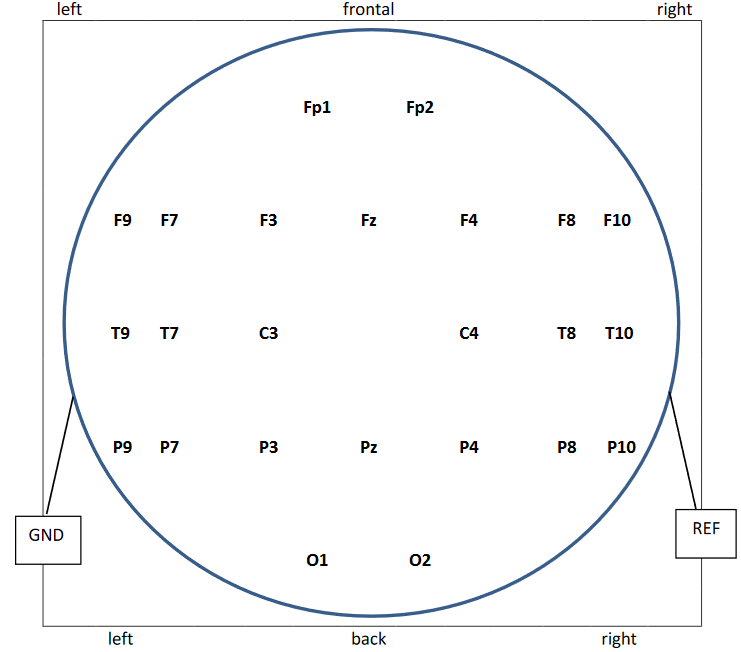
</div>

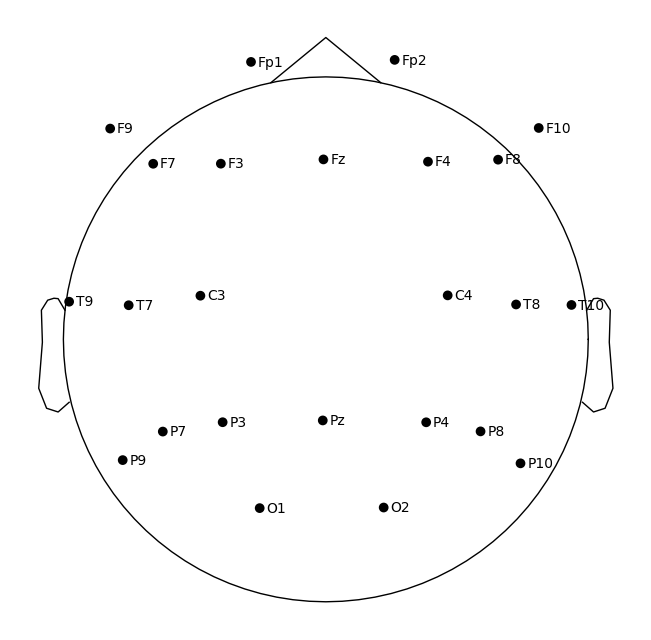

In [29]:
# Standard Map laden und an Datensatz zufügen
montage = mne.channels.make_standard_montage('standard_1020')
raw_active.set_montage(montage)
raw_passive.set_montage(montage)

# Erstelle ein Plot der Standard Montage und vergleiche sie mit der obigen Abbildung. 
fig = raw_active.plot_sensors(show_names=True)

### Daten Betrachtung

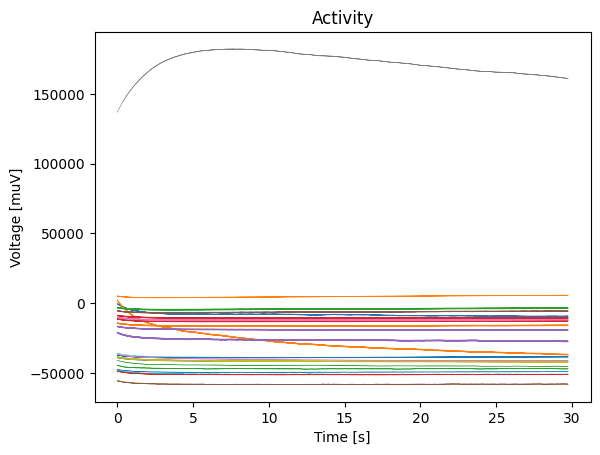

In [6]:
# Erstelle einen Plot der EEG Daten von 5 Kanälen über 5 Sekunden. 
# Starte von Sekunde 10. Verwende außerdem lowpass=40 und highpass=70.
# Verwende dazu die mne function "plot()"
plt.ion()
#raw_passive.plot(duration=5, start=10, n_channels=5, lowpass=40, highpass=70)
plot_signal(raw_passive, electrodes=range(24))

# Verwende diese Zeile "plt.show()" nach jeder Grakfik die du erstellst. Ansonsten wird die Grafik immer doppelt gezeigt.
plt.show()

Falls ihr eine Elektrode (oder mehrere) entdeckt die viel höhere Werte hat als alle anderen, solltet ihr herausfinden welche es ist...

In [7]:
# Dazu könnte ihr die Funktion "threshold_electrode()" verwenden
# Sie gibt an welche Elektrode über einen bestimmten Wert gestiegen ist 
threshold_electrode(raw_passive, 30000)

Electrode(s) with values above 30000: Name ['P7']


### Power Spectrum
EEG Daten sind aus Signalen von verschiedenen Frequenzen zusammengesetzt. Wenn ihr in der obigen `plot()` Funktion mit den Werten für `lowpass` und `highpass` spielt, seht ihr, dass es einen großen Einfluss auf das Signal hat. "low"- und "highpass" sind Filter, die bestimmte Frequenzen aus dem Signal entfernen. Dies ist sehr praktisch, da nicht alle Frequenzen echte Gehirnaktivität darstellen. Mehr über Filter lernt ihr im nächsten Abschnitt **Preprocessing**

Jede Frequenz trägt unterschiedlich viel zur gesamten Leistung des Signals bei. In diesem Aufgabenteil wollen herausfinden welche Frequenzen in unseren EEG Daten am stärksten vertreten sind. 

In der folgenden Abbildung seht ihr wie ein typisches EEG Spektrum ausseht. Vergleicht euer Spektrum mit diesem (achtet auf die x-Achse) und beschreibt was ihr seht.
<div>
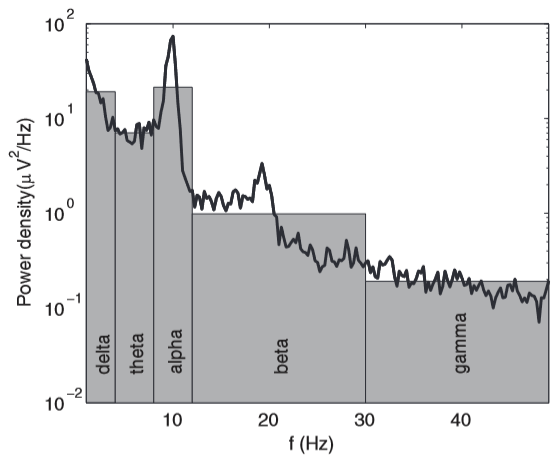
</div>


NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 4.096 (s)


/data/u_grossmannr_software/miniconda3/lib/python3.11/site-packages/mne/viz/utils.py:165: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


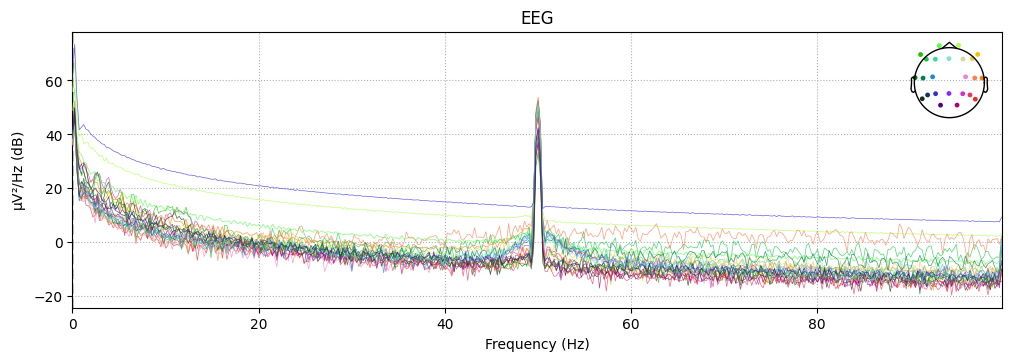

In [8]:
# um einen solchen plot zu erstellen verwende die function "plot_psd()"
# verwende für den Parameter fmax=100  
raw_passive.plot_psd(0, 100)
plt.show()

### Preprocessing
Die mit der EEG Kappe gemessene Aktivität ist leider nicht reine Gehirnaktivität. Da die Elektroden in der Kappe sehr sensitiv sind nehmen sie auch jede andere Veränderung von elektrischem Potenzial wahr. 
Ein paar Beispiele für sogenannte Rauschfaktoren sind:
- Augenzwinkern 
- Herzschlag
- Bewegung
- Stromleitungen 

In [ ]:
# Downsampling (weniger Datenpunkte) - dann geht das Bearbeiten schneller
resample_freq = 200
raw_active.resample(resample_freq)
raw_passive.resample(resample_freq)

In [ ]:
# Ermittle Kanäle mit schlechtem Signal 


# Entferne kaputte Kanäle 

Entferne flukturierende Hintergrundaktivität 


In [9]:
# Verwende hierzu die Funktion "detrend()"
X = raw_passive.get_data().T # transpose so the data is organized time-by-channels
X, _, _ = detrend(X, order=1)
X, _, _ = detrend(X, order=6)
raw_passive._data = X.T  # overwrite raw data

In [13]:
# filtering: entferne 50 HZ signal 
filtered_passive = raw_passive.filter(l_freq=0.5, h_freq=40)


# DC filtering


# f - Rauschen abziehen

# ICA - reject components

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 3301 samples (6.602 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


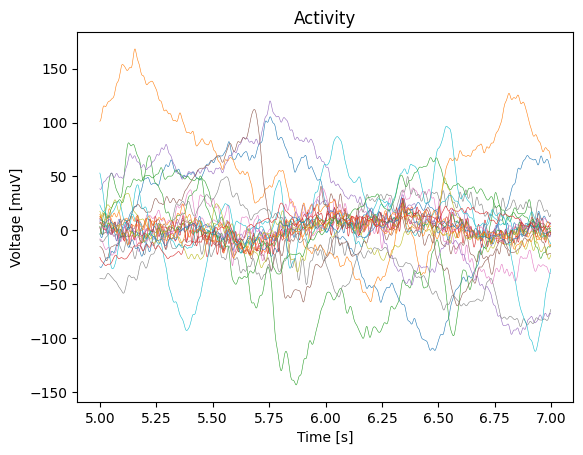

In [14]:
plot_signal(raw_passive, start=5, end=7)

In [ ]:
# Check ob slow frequncy drift in den Daten sind
raw_active.plot(duration=30, proj=False, n_channels=5, remove_dc=True, lowpass=40, highpass=70)
plt.plot()

In [17]:
print(raw_passive.info["bads"])

[]


Betrachtet die Daten noch einmal nach dem ihr die Preprocessing Schritte durchgeführt habt. Was hat sich verändert? 

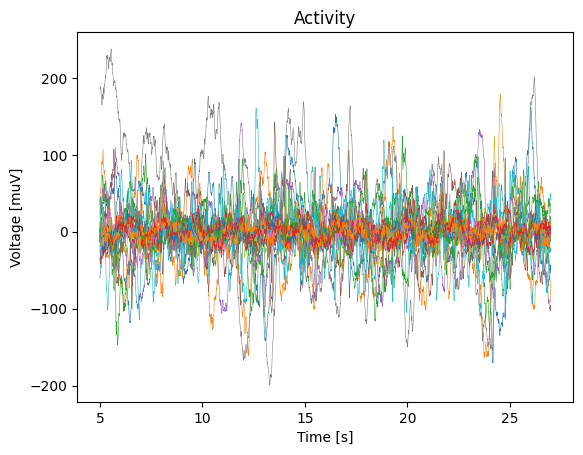

In [35]:
plot_signal(filtered_passive, start=5, end=27, sfreq=200)

### Topography

Als nächstes wollen wir sehen wie die gemessene Aktivität über die Elektroden (welche verschiedene Bereiche des Gehirns messen) verteilt ist. Da wir im obigen Schritt die Elektrodenposition bereits mit den Daten gelinkt haben, können wir die Aktivität nun für die ganze EEG Kappe grafisch darstellen.   

Dafür müssen wir uns erst einen Zeitpunkt aussuchen den wir betrachten wollen.

In [ ]:
zeitpunkt = 3
filtered_x = np.array(filtered.get_data())[:, zeitpunkt*500]
viz.plot_topomap(filtered, raw_active.info)

In [ ]:
filtered_int = np.sum(np.array(filtered.get_data())**2, 1)
viz.plot_topomap(filtered_int, raw_active.info, )

In [ ]:
# wähle einen Zeitpunkt (in Sekunden)
zeitpunkt = 3
topography_data_active = np.array(raw_active.get_data())[:, zeitpunkt]
topography_data_passive = np.array(raw_passive.get_data())[:, zeitpunkt]

# Erstelle einen Topographie Plot
viz.plot_topomap(topography_data_active, raw_active.info)
viz.plot_topomap(topography_data_passive, raw_passive.info)
plt.show()

In [ ]:
filtered.plot_psd(0,50)

In [ ]:
# Begutachte das Frequenzspektrum 
raw_active.plot_psd(0,30)
raw_passive.plot_psd(0,30)
plt.show()

### Energieverbrauch berechnen
Da wir jetzt wissen wie viel power jede Frequenz hat, können wir die gesamte Power von allen Frequenzen berechnen. 

In [16]:
# Integriere das Power Spektrum beider Datensätze
integrated_passive = np.sum(filtered_passive_aplha.get_data()**2, 1)
viz.plot_topomap(integrated_passive, filtered_passive_aplha.info)

NameError: name 'filtered_passive_aplha' is not defined

In [15]:
integrated_passive

NameError: name 'integrated_passive' is not defined